In [1]:
from collections import OrderedDict
from datetime import timedelta
import pandas as pd
import numpy as np
import pmdarima as pm
import matplotlib.pyplot as plt

In [2]:
# LOAD NAMES
dmkt = "C:/Users/Keegan/OneDrive/1 Studies/2021 - 2022/5003W/3 - Dissertation/5-Data/cleaned/univariate/market_indices/market_names.csv"
mkt_names = pd.read_csv(dmkt).values.tolist()
mkt_names = [item for sublist in mkt_names for item in sublist]

# LOAD DATA
dd = "C:/Users/Keegan/OneDrive/1 Studies/2021 - 2022/5003W/3 - Dissertation/5-Data/cleaned/univariate/market_indices/"
dirs = []
data = OrderedDict()
for i in range(len(mkt_names)):
    # concat strings to get directories
    nm = mkt_names[i]
    directory = dd+nm+".csv"
    # store
    dirs.append(directory)
    data[nm] = pd.read_csv(directory)
    del directory, nm

In [3]:
# Date parameters
E1 = pd.to_datetime("2020-01-13")
E2 = pd.to_datetime("2020-01-24")
E3 = pd.to_datetime("2020-02-24")
E4 = pd.to_datetime("2020-03-09")

CUT1 = pd.to_datetime("2019-04-29")
CUT2 = pd.to_datetime("2020-06-01")

In [36]:
# select data
MKT = "SPX.Index"
dataset = data[MKT].copy(deep=True)
# format dates
dataset['date'] = pd.to_datetime(dataset['date'].values)
# change colname for ease of use
dataset = dataset.rename(columns={'date':'date',MKT:'val'})
# set data splitting parameters
date1 = E1
date2 = CUT2+timedelta(days=365)
# split dataset
train = dataset[(dataset["date"] < date1)] # & (dataset['date'] > pd.to_datetime("2016-01-01")) 
test = dataset[(dataset["date"] > date1) & (dataset["date"] < date2)]
extra = dataset[(dataset["date"] > date2)]
print(
    'train.shape: ', train.shape, '\n',
    'test.shape: ', test.shape, '\n',
    'extra.shape: ', extra.shape
)
# retain date seqs
dtrain, dtest, dextra = pd.to_datetime(train.date), pd.to_datetime(test.date), pd.to_datetime(extra.date)
# format structures (and dtypes) for arima
train, test, extra = train.val.values, test.val.values, extra.val.values

train.shape:  (3026, 2) 
 test.shape:  (347, 2) 
 extra.shape:  (183, 2)


In [37]:
# Fit a simple auto_arima model
arima = pm.auto_arima(train, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=5)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(1,0,1)[5] intercept   : AIC=26116.299, Time=0.60 sec
 ARIMA(0,1,0)(0,0,0)[5] intercept   : AIC=26126.234, Time=0.05 sec
 ARIMA(1,1,0)(1,0,0)[5] intercept   : AIC=26114.550, Time=0.33 sec
 ARIMA(0,1,1)(0,0,1)[5] intercept   : AIC=26113.633, Time=0.37 sec
 ARIMA(0,1,0)(0,0,0)[5]             : AIC=26127.680, Time=0.04 sec
 ARIMA(0,1,1)(0,0,0)[5] intercept   : AIC=26117.192, Time=0.23 sec
 ARIMA(0,1,1)(1,0,1)[5] intercept   : AIC=26115.282, Time=0.41 sec
 ARIMA(0,1,1)(0,0,2)[5] intercept   : AIC=26115.595, Time=0.55 sec
 ARIMA(0,1,1)(1,0,0)[5] intercept   : AIC=26113.577, Time=0.34 sec
 ARIMA(0,1,1)(2,0,0)[5] intercept   : AIC=26115.454, Time=0.51 sec
 ARIMA(0,1,1)(2,0,1)[5] intercept   : AIC=26117.218, Time=0.50 sec
 ARIMA(0,1,0)(1,0,0)[5] intercept   : AIC=26123.001, Time=0.26 sec
 ARIMA(1,1,1)(1,0,0)[5] intercept   : AIC=26113.310, Time=0.38 sec
 ARIMA(1,1,1)(0,0,0)[5] intercept   : AIC=26116.803, Time=0.27 sec
 ARIMA(1,1,1)(2,0,0

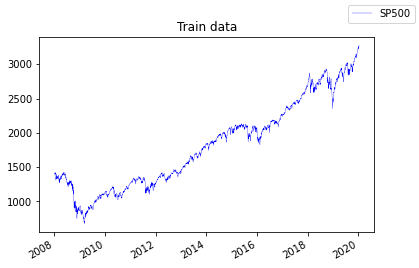

In [39]:
# Plot actual train data:
# fig, (ax1, ax2) = plt.subplots(1, 2, sharey=True)
fig, ax = plt.subplots()
ax.plot(dtrain, train, color='blue', linewidth=0.3, label="SP500")
fig.legend()
fig.autofmt_xdate()
plt.title('Train data')
fig.savefig("train.png", dpi=300, facecolor='white', edgecolor='white')

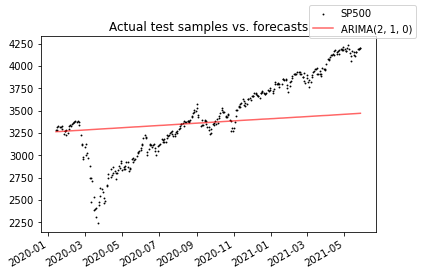

In [40]:
# Plot actual test vs. forecasts:
fig, ax = plt.subplots()
ax.scatter(
    dtest,
    test,
    marker='.',
    s = 3,
    color = 'black',
    label="SP500"
    )
ax.plot(
    dtest,
    arima.predict(n_periods=test.shape[0]),
    color = 'red',
    alpha = 0.6,
    label=('ARIMA'+str(arima.order))
    )

fig.legend()
fig.autofmt_xdate()
plt.title('Actual test samples vs. forecasts')
plt.show()
fig.savefig("brokenARIMA.png", dpi=300, facecolor='white', edgecolor='white')

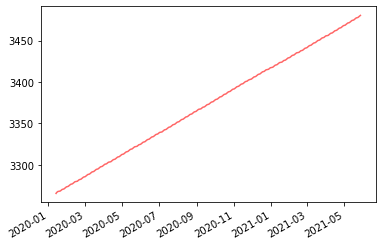

In [8]:
fig, ax = plt.subplots()
ax.plot(
    dtest,
    arima.predict(n_periods=test.shape[0]),
    color = 'red',
    alpha = 0.6,
    label=('ARIMA'+str(arima.order))
    )
fig.autofmt_xdate()
plt.show()

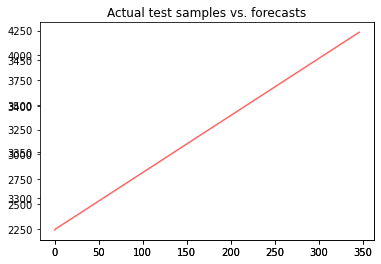

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


In [9]:
# Plot actual test vs. forecasts:s
x = np.arange(test.shape[0])
fig = plt.figure()
ax1 = fig.add_subplot()
scatter = ax1.scatter(
    x,
    test,
    marker='.',
    s = 3,
    color = 'black'
    )
ax2 = fig.add_subplot()
line = ax2.plot(
    x,
    arima.predict(n_periods=test.shape[0]),
    color = 'red',
    alpha = 0.6,
    label=('arima'+str(arima.order))
    )
# plt.plot(x, test)
plt.title('Actual test samples vs. forecasts')
plt.show()
ax1.legend()

In [ ]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

# #############################################################################
# Load the data and split it into separate pieces
tdata = pm.datasets.load_wineind()
ttrain, ttest = pm.model_selection.train_test_split(tdata, train_size=150)

# Fit a simple auto_arima model
arima = pm.auto_arima(ttrain, error_action='ignore', trace=True,
                      suppress_warnings=True, maxiter=5,
                      seasonal=True, m=12)

# #############################################################################
# Plot actual test vs. forecasts:
x = np.arange(ttest.shape[0])
plt.scatter(x, ttest, marker='x')
plt.plot(x, arima.predict(n_periods=test.shape[0]))
plt.title('Actual test samples vs. forecasts')
plt.show()